<b>To predict the area burned in the Forest Fire.

In [97]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('/content/forestfires.csv')

In [99]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<h2> Data Description</h2>

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [100]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [101]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [102]:
df.shape

(517, 13)

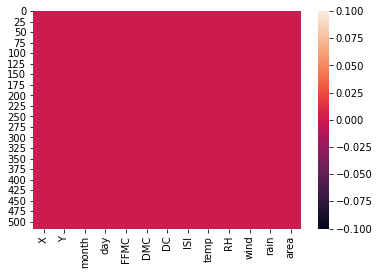

In [103]:
sns.heatmap(data=df.isnull())

Clean data, No missing Values

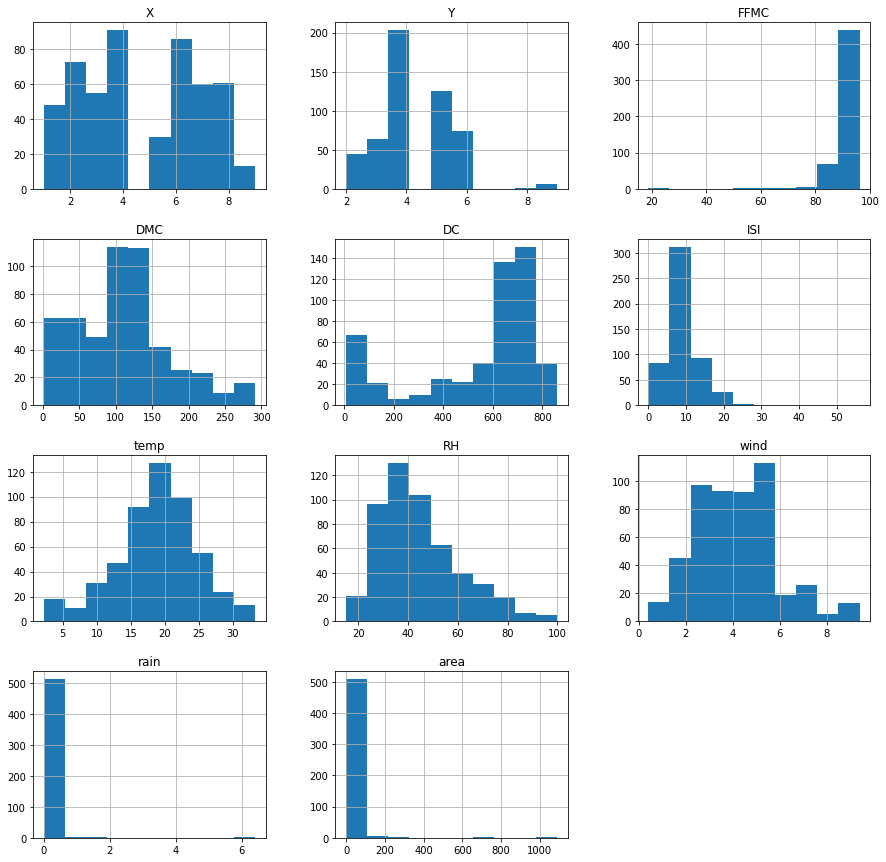

In [104]:
df.hist(figsize=(15,15))
plt.show()

In [105]:
x= df.drop(['area'], axis=1)
y = df['area']

In [106]:
x= df.drop(['day','month'], axis=1)


In [107]:
x.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [116]:
cate_columns = x.select_dtypes(include='object').columns.tolist()
nume_columns = x.select_dtypes(exclude='object').columns.tolist()
print('Categorical columns: ',cate_columns)
print('Numerical columns: ',nume_columns)

Categorical columns:  []
Numerical columns:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [117]:
print("Skew: \n{}".format(df.skew()))
print("Kurtosis: \n{}".format(df.kurtosis()))

Skew: 
X        0.036246
Y        0.417296
FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64
Kurtosis: 
X        -1.172331
Y         1.420553
FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64


Skew is the degree of distortion from a normal distribution. skewed, meaning there are a minority of very large values.

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.

Feature columns with (high, +ve, or -ve) outliers, skewness and kurtosis are:

 - FFMC
 - ISI
 - rain
 - area

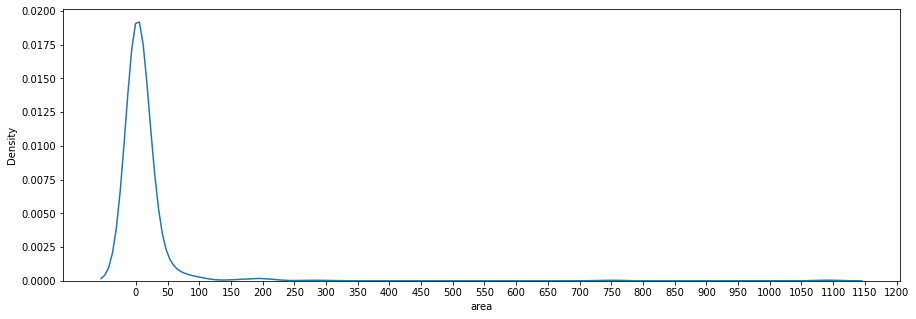

In [118]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['area'])
plt.xticks([i for i in range(0,1250,50)])
plt.show()

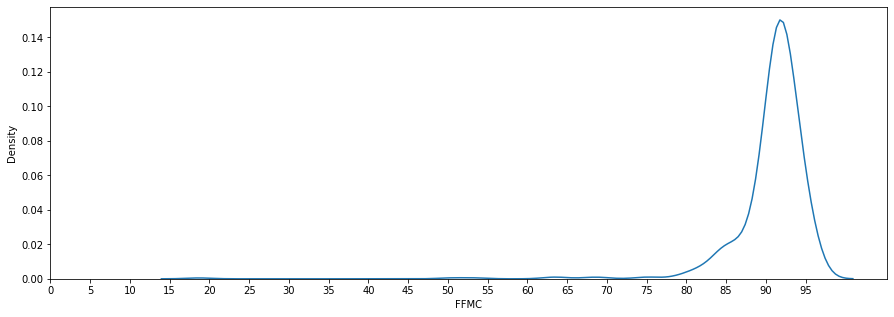

In [119]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['FFMC'])
plt.xticks([i for i in range(0,100,5)])
plt.show()

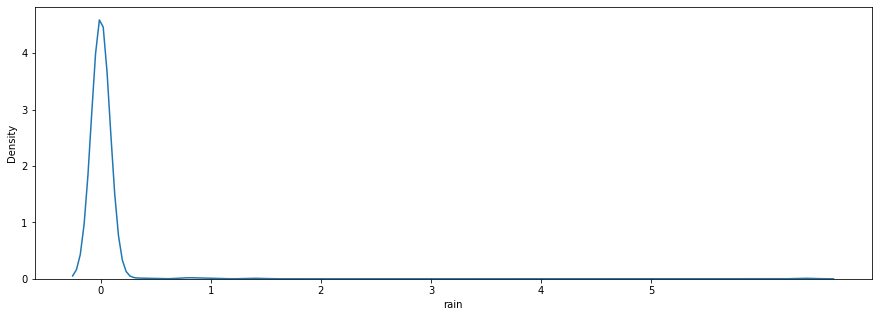

In [120]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['rain'])
plt.xticks([i for i in range(0,6)])
plt.show()

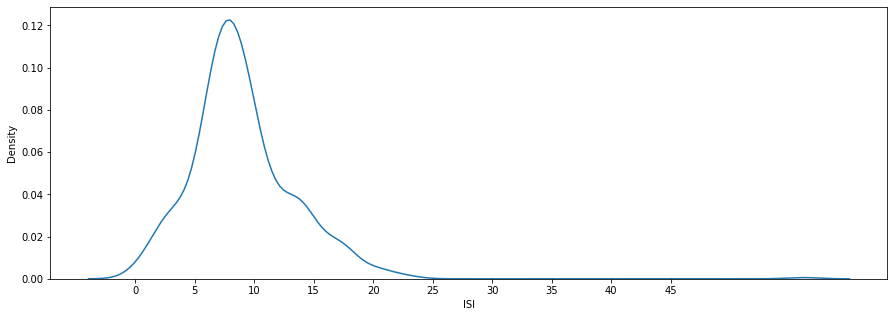

In [121]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(df['ISI'])
plt.xticks([i for i in range(0,50,5)])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


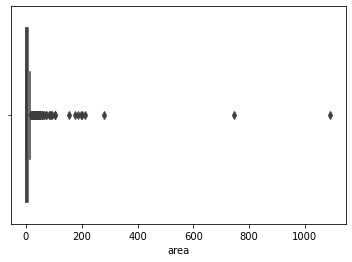

In [122]:
outl_dect = sns.boxplot(df['area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


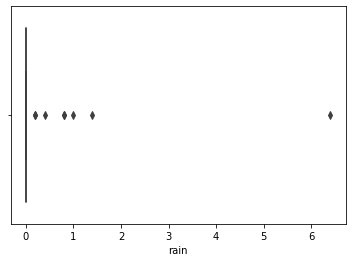

In [123]:
outl_dect = sns.boxplot(df['rain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


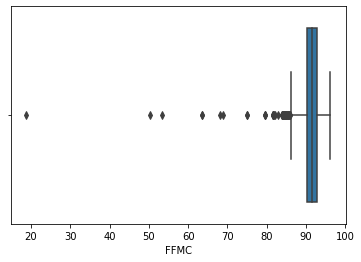

In [124]:
outl_dect = sns.boxplot(df['FFMC'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


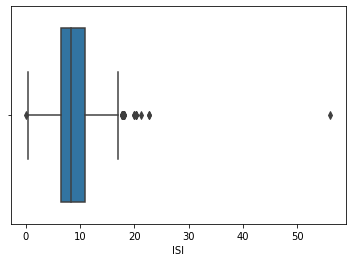

In [125]:
outl_dect = sns.boxplot(df['ISI'])

In [126]:
#Instead of removing them we will transform the data to treat the outliers.

outlier_columns = ['area','FFMC','ISI','rain']
np.log1p(df[outlier_columns]).skew()

area     1.217838
FFMC   -11.675394
ISI     -0.937218
rain    14.173028
dtype: float64

In [127]:
np.log1p(df[outlier_columns]).kurtosis()

area      0.945668
FFMC    185.482383
ISI       2.584588
rain    234.240025
dtype: float64

Even after transformation we still have high skewness and kurtosis in FFMC & rain

In [128]:
#Removing outliers by zscore method.
from scipy.stats import zscore
mask = df.loc[:,['FFMC']].apply(zscore).abs() < 3

In [129]:
df =df[mask.values]
df.shape

(510, 13)

In [130]:
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))

In [131]:
df[outlier_columns] = np.log1p(df[outlier_columns])
df[outlier_columns].skew()

area    1.208492
FFMC   -1.803993
ISI    -0.434372
rain    7.818265
dtype: float64

In [132]:
data=df

In [133]:
'''from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

le = LabelEncoder() 
data['day']= le.fit_transform(data['day']) 
data['month']= le.fit_transform(data['month']) '''


In [134]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.000000,0.0
1,7,4,10,5,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.000000,0.0
2,7,4,10,2,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.000000,0.0
3,8,6,7,0,4.529368,33.3,77.5,2.302585,8.3,97,4.0,0.693147,0.0
4,8,6,7,3,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.000000,0.0


In [135]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,4.680392,4.294118,5.752941,2.749020,4.522609,111.837647,550.470392,2.228457,18.951569,44.029412,4.017255,0.010873,1.121351
std,2.320534,1.234636,4.383141,1.931984,0.034979,63.853719,246.630662,0.428759,5.789930,15.968323,1.788793,0.086214,1.401431
min,1.000000,2.000000,0.000000,0.000000,4.332048,3.000000,7.900000,0.741937,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,4.514151,73.250000,442.300000,2.041220,15.625000,32.250000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,4.528829,108.400000,664.200000,2.240710,19.300000,41.500000,4.000000,0.000000,0.457245
75%,7.000000,5.000000,11.000000,4.000000,4.542230,142.400000,714.200000,2.484907,22.800000,53.000000,4.900000,0.000000,2.025183
max,9.000000,9.000000,11.000000,6.000000,4.576771,291.300000,860.600000,4.044804,33.300000,99.000000,9.400000,0.693147,6.995620


In [139]:
X= data.drop(['day','month'], axis=1)
y=  data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis

models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVR(),
    "KNN": KNeighborsRegressor(),
    "XGbr":XGBRegressor(),
    "SGD": SGDRegressor(),
    "Decisiontree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(max_features='sqrt', random_state=5),
}

for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    print("")

Linear Regression
Score:  1.0

KNN
Score:  -0.1195621200412591

SVM
Score:  -0.1165924503859108

[07:01:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGbr
Score:  0.9995011163171664

SGD
Score:  -4.263210271718731e+28

Decisiontree
Score:  0.9981339865437848

RandomForest
Score:  0.9150972569331404



In [142]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(base_score=0.3, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.24, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=102,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [144]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, eval_metric=["rmse"],eval_set=eval_set, verbose=False)
preds = xg_reg.predict(X_test)

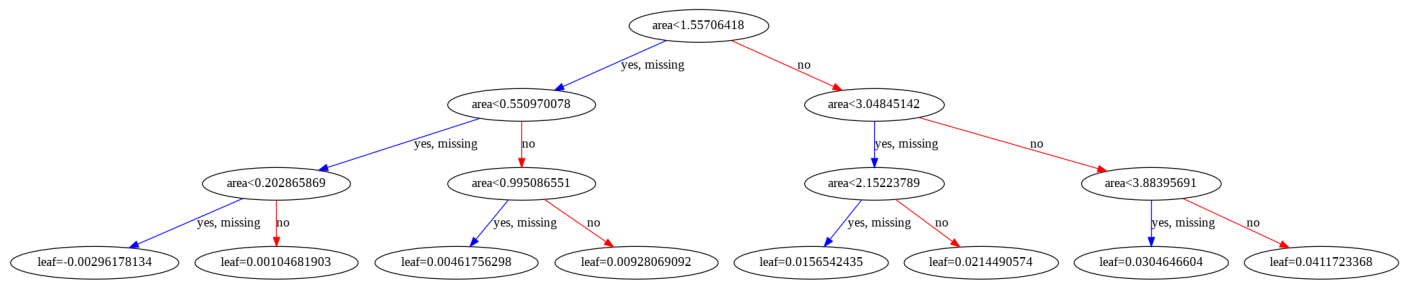

In [147]:
xgb.plot_tree(xg_reg,num_trees=0)

plt.rcParams['figure.figsize'] = [30, 15]
plt.show()